## **FINAL PROJECT DATA MINING I**

### **Kelompok 6 Data Mining I SD-A1**
1. Sri Ranita                    (162112133003)
2. Sukma Sekar Devita            (162112133015)
3. Theresa Agnes Virnauli Sinaga (162112133058)
4. Della Lukita Wardhani         (162112133075)
5. Farah Aisyah Munir            (162112133077)

### **Link Dataset**

Data yang kami gunakan untuk penelitian dapat diunduh pada link berikut ini:
https://bit.ly/DatasetAnalisisShopee

## **Import Library**

In [94]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


## **Load Dataset**

In [95]:
# data = pd.read_csv("dataset.csv")
# data.head()

path_dataset = "/content/dataset.csv"
data = pd.read_csv(path_dataset)
data.head()

,gender,prodi,angkatan,usia,ketersediaan_produk,kualitas_produk,harga,promosi,ketepatan_pengiriman,penanganan_keluhan,frekuensi_akses_shopee,frekuensi_transaksi,kepuasan_konsumen,skor_kepuasan
0,P,Teknik Elektro,2021,19,Selalu Tersedia,Mudah Rusak,Cenderung Mahal,Menarik,Tepat Waktu,Baik dan Respon Cepat,120,6,Puas,3
1,L,Teknik Elektro,2021,21,Selalu Tersedia,Tahan Lama,Cenderung Murah,Menarik,Tepat Waktu,Baik dan Respon Cepat,10,3,Puas,4
2,L,Teknik Elektro,2021,21,Selalu Tersedia,Tahan Lama,Cenderung Murah,Menarik,Tepat Waktu,Baik dan Respon Cepat,7,3,Puas,3
3,L,Teknik Elektro,2021,19,Selalu Tersedia,Tahan Lama,Cenderung Murah,Tidak Menarik,Tepat Waktu,Baik dan Respon Cepat,30,1,Puas,4
4,P,Teknik Industri,2021,19,Selalu Tersedia,Tahan Lama,Cenderung Murah,Menarik,Tepat Waktu,Baik dan Respon Cepat,10,10,Puas,4


## **Data Exploration**

### 1. Check Data Shape

In [96]:
data.shape

(316, 14)

### 2. Check Data Information

Menampilkan informasi terkait data yang berisi jumlah kolom, label kolom, tipe data, penggunaan memori, indeks rentang, dan jumlah sel di setiap kolom (non-null values).

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  316 non-null    object
 1   prodi                   316 non-null    object
 2   angkatan                316 non-null    int64 
 3   usia                    316 non-null    int64 
 4   ketersediaan_produk     316 non-null    object
 5   kualitas_produk         316 non-null    object
 6   harga                   316 non-null    object
 7   promosi                 316 non-null    object
 8   ketepatan_pengiriman    316 non-null    object
 9   penanganan_keluhan      316 non-null    object
 10  frekuensi_akses_shopee  316 non-null    int64 
 11  frekuensi_transaksi     316 non-null    int64 
 12  kepuasan_konsumen       316 non-null    object
 13  skor_kepuasan           316 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 34.7+ KB


### 3. Check Data Desciption

Menampilkan deskripsi data dari DataFrame yang berisi ringkasan statistik setiap kolom dalam DataFrame, yaitu count (jumlah nilai yang tidak kosong), nilai unik atribut, top value dan frekuensinya, mean (rata-rata), std (standar deviasi), nili minimum, persentil 25%, persentil 50%, persentil 75%, dan nilai maksimum.

In [98]:
data.describe(include='all')

,gender,prodi,angkatan,usia,ketersediaan_produk,kualitas_produk,harga,promosi,ketepatan_pengiriman,penanganan_keluhan,frekuensi_akses_shopee,frekuensi_transaksi,kepuasan_konsumen,skor_kepuasan
count,316,316,316.000000,316.000000,316,316,316,316,316,316,316.000000,316.000000,316,316.000000
unique,2,5,NaN,NaN,2,2,2,2,2,2,NaN,NaN,2,NaN
top,P,Teknologi Sains Data,NaN,NaN,Selalu Tersedia,Tahan Lama,Cenderung Murah,Menarik,Tepat Waktu,Baik dan Respon Cepat,NaN,NaN,Puas,NaN
freq,197,84,NaN,NaN,258,255,244,244,265,263,NaN,NaN,275,NaN
mean,NaN,NaN,2020.968354,19.746835,NaN,NaN,NaN,NaN,NaN,NaN,51.727848,6.620253,NaN,3.161392
std,NaN,NaN,0.595442,0.998009,NaN,NaN,NaN,NaN,NaN,NaN,46.054853,6.632395,NaN,0.810191
min,NaN,NaN,2020.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,1.000000
25%,NaN,NaN,2021.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,2.000000,NaN,3.000000
50%,NaN,NaN,2021.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,3.000000
75%,NaN,NaN,2021.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,10.000000,NaN,4.000000


### 4. Check Data Columns

Menampilkan atribut-atribut yang ada di dalam DataFrame.

In [99]:
data.columns

Index(['gender', 'prodi', 'angkatan', 'usia', 'ketersediaan_produk',
       'kualitas_produk', 'harga', 'promosi', 'ketepatan_pengiriman',
       'penanganan_keluhan', 'frekuensi_akses_shopee', 'frekuensi_transaksi',
       'kepuasan_konsumen', 'skor_kepuasan'],
      dtype='object')

### 5. Unique Value Categorical X Variable 

In [100]:
X_kategorik = data[['gender', 'ketersediaan_produk', 'kualitas_produk', 'harga', 'promosi', 'ketepatan_pengiriman', 'penanganan_keluhan']]

for column in X_kategorik.columns:
    unique_values = X_kategorik[column].unique()
    print(f"Nilai unik dari kolom {column}:")
    print(unique_values)
    print()

Nilai unik dari kolom gender:
['P' 'L']

Nilai unik dari kolom ketersediaan_produk:
['Selalu Tersedia' 'Sering Kosong']

Nilai unik dari kolom kualitas_produk:
['Mudah Rusak' 'Tahan Lama']

Nilai unik dari kolom harga:
['Cenderung Mahal' 'Cenderung Murah']

Nilai unik dari kolom promosi:
['Menarik' 'Tidak Menarik']

Nilai unik dari kolom ketepatan_pengiriman:
['Tepat Waktu' 'Sering Terlambat']

Nilai unik dari kolom penanganan_keluhan:
['Baik dan Respon Cepat' 'Buruk dan Respon Lambat']



#### a. Display Proportion of Gender Variable

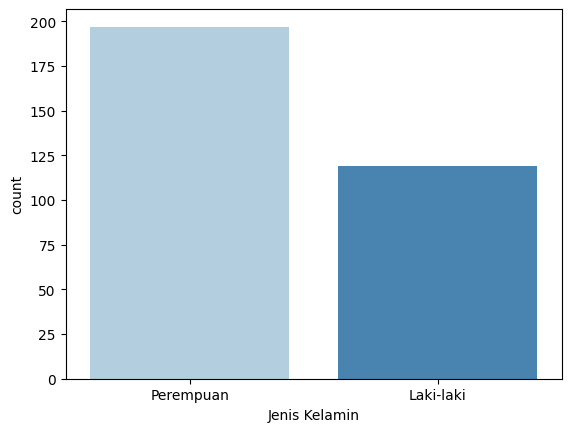

Count of Perempuan	:  197
Count of Laki-Laki	:  119


In [101]:
sns.countplot(x="gender", data=data, palette="Blues", order=data["gender"].value_counts().index.tolist())
plt.xlabel("Jenis Kelamin")
new_xticklabels = ["Perempuan", "Laki-laki"]
plt.xticks([0, 1], new_xticklabels)
plt.show()

A, B = data['gender'].value_counts()
print('Count of Perempuan\t: ', A)
print('Count of Laki-Laki\t: ', B)

#### b. Display Proportion of "Product Availability" Variable

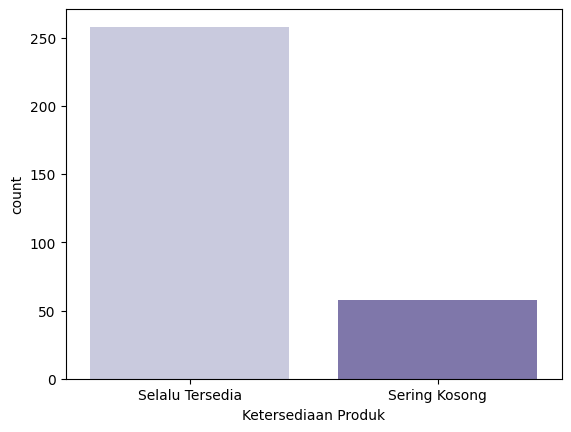

Count of Selalu Tersedia	:  258
Count of Sering Kosong		:  58


In [102]:
sns.countplot(x="ketersediaan_produk", data=data, palette="Purples", order=data["ketersediaan_produk"].value_counts().index.tolist())
plt.xlabel("Ketersediaan Produk")
new_xticklabels = ["Selalu Tersedia", "Sering Kosong"]
plt.xticks([0, 1], new_xticklabels)
plt.show()

A, B = data['ketersediaan_produk'].value_counts()
print('Count of Selalu Tersedia\t: ', A)
print('Count of Sering Kosong\t\t: ', B)

#### c. Display Proportion of "Product Quality" Variable

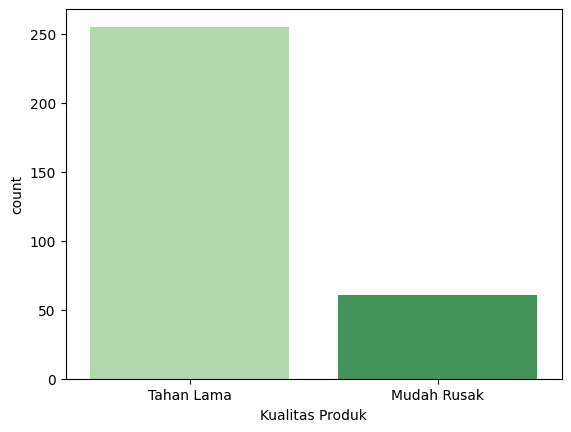

Count of Tahan Lama	:  255
Count of Mudah Rusak	:  61


In [103]:
sns.countplot(x="kualitas_produk", data=data, palette="Greens", order=data["kualitas_produk"].value_counts().index.tolist())
plt.xlabel("Kualitas Produk")
new_xticklabels = ['Tahan Lama', 'Mudah Rusak']
plt.xticks([0, 1], new_xticklabels)
plt.show()

A, B = data['kualitas_produk'].value_counts()
print('Count of Tahan Lama\t: ', A)
print('Count of Mudah Rusak\t: ', B)

#### d. Display Proportion of "Price" Variable

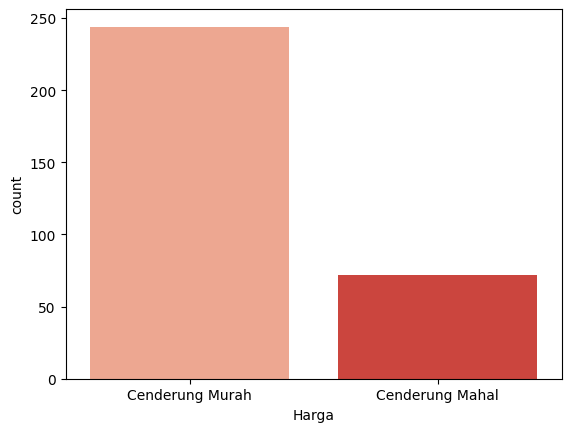

Count of Cenderung Murah	:  244
Count of Cenderung Mahal	:  72


In [104]:
sns.countplot(x="harga", data=data, palette="Reds", order=data["harga"].value_counts().index.tolist())
plt.xlabel("Harga")
new_xticklabels = ['Cenderung Murah', 'Cenderung Mahal']
plt.xticks([0, 1], new_xticklabels)
plt.show()

A, B = data['harga'].value_counts()
print('Count of Cenderung Murah\t: ', A)
print('Count of Cenderung Mahal\t: ', B)

#### e. Display Proportion of "Promotion" Variable

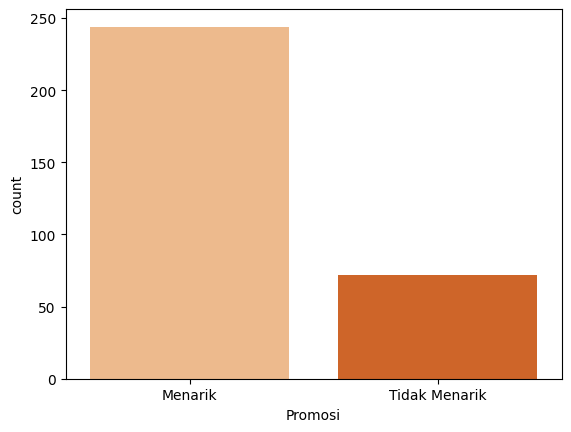

Count of Menarik	:  244
Count of Tidak Menarik	:  72


In [105]:
sns.countplot(x="promosi", data=data, palette="Oranges", order=data["promosi"].value_counts().index.tolist())
plt.xlabel("Promosi")
new_xticklabels = ['Menarik', 'Tidak Menarik']
plt.xticks([0, 1], new_xticklabels)
plt.show()

A, B = data['promosi'].value_counts()
print('Count of Menarik\t: ', A)
print('Count of Tidak Menarik\t: ', B)

#### f. Display Proportion of "Shipping Accuracy" Variable

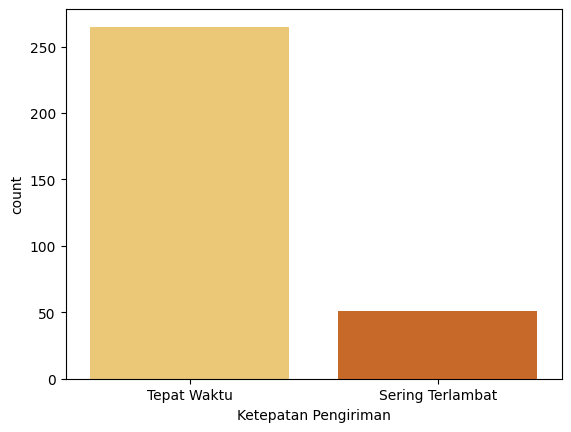

Count of Tepat Waktu		:  265
Count of Sering Terlambat	:  51


In [106]:
sns.countplot(x='ketepatan_pengiriman', data=data, palette="YlOrBr", order=data["ketepatan_pengiriman"].value_counts().index.tolist())
plt.xlabel("Ketepatan Pengiriman")
new_xticklabels = ['Tepat Waktu', 'Sering Terlambat']
plt.xticks([0, 1], new_xticklabels)
plt.show()

A, B = data['ketepatan_pengiriman'].value_counts()
print('Count of Tepat Waktu\t\t: ', A)
print('Count of Sering Terlambat\t: ', B)

#### g. Display Proportion of "Complaint Management" Variable

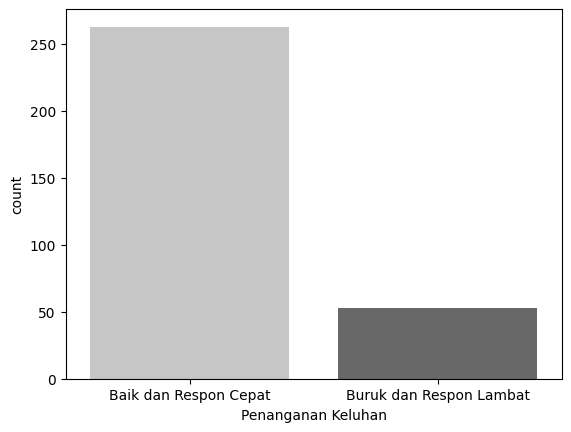

Count of Baik dan Respon Cepat		:  263
Count of Buruk dan Respon Lambat	:  53


In [107]:
sns.countplot(x='penanganan_keluhan', data=data, palette="Greys", order=data["penanganan_keluhan"].value_counts().index.tolist())
plt.xlabel("Penanganan Keluhan")
new_xticklabels = ['Baik dan Respon Cepat', 'Buruk dan Respon Lambat']
plt.xticks([0, 1], new_xticklabels)
plt.show()

A, B = data['penanganan_keluhan'].value_counts()
print('Count of Baik dan Respon Cepat\t\t: ', A)
print('Count of Buruk dan Respon Lambat\t: ', B)

### 6. Numerical X Variable 

#### a. Age

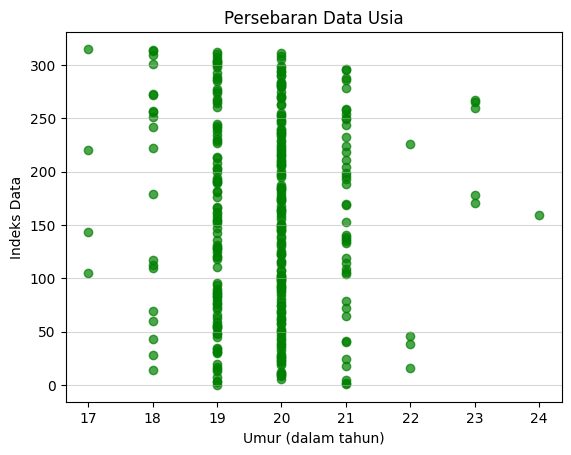

In [108]:
Xn_1 = data['usia']

plt.scatter(Xn_1, range(len(Xn_1)), color='green', alpha=0.7)
plt.title('Persebaran Data Usia')
plt.xlabel('Umur (dalam tahun)')
plt.ylabel('Indeks Data')
plt.grid(axis='y', alpha=0.5)

plt.show()

#### b. Access Frequency

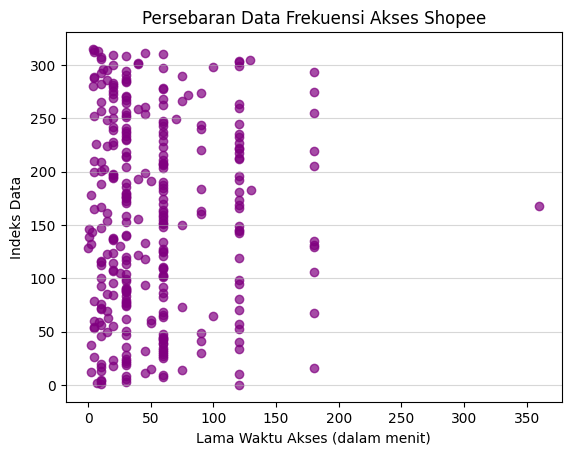

In [109]:
Xn_2 = data['frekuensi_akses_shopee']

plt.scatter(Xn_2, range(len(Xn_2)), color='purple', alpha=0.7)
plt.title('Persebaran Data Frekuensi Akses Shopee')
plt.xlabel('Lama Waktu Akses (dalam menit)')
plt.ylabel('Indeks Data')
plt.grid(axis='y', alpha=0.5)

plt.show()

#### c. Transaction Frequency 

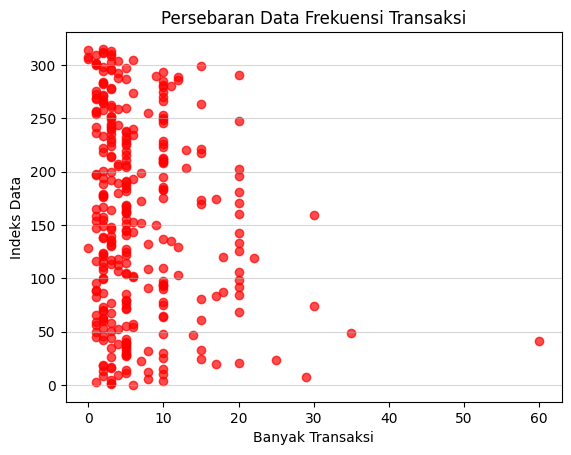

In [110]:
Xn_3 = data['frekuensi_transaksi']

plt.scatter(Xn_3, range(len(Xn_3)), color='Red', alpha=0.7)
plt.title('Persebaran Data Frekuensi Transaksi')
plt.xlabel('Banyak Transaksi')
plt.ylabel('Indeks Data')
plt.grid(axis='y', alpha=0.5)

plt.show()

#### d. Satisfied Score

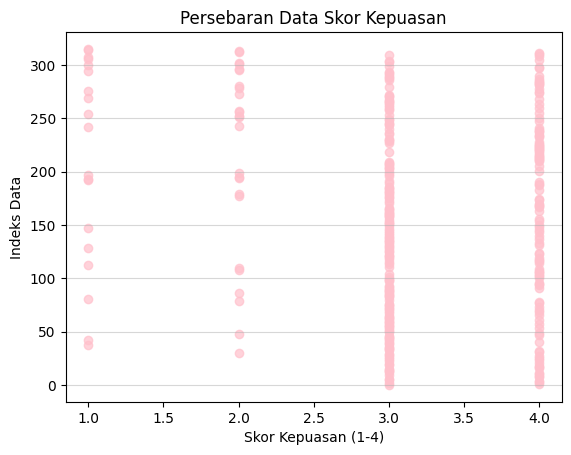

In [111]:
Xn_4 = data['skor_kepuasan']

plt.scatter(Xn_4, range(len(Xn_4)), color='pink', alpha=0.7)
plt.title('Persebaran Data Skor Kepuasan')
plt.xlabel('Skor Kepuasan (1-4)')
plt.ylabel('Indeks Data')
plt.grid(axis='y', alpha=0.5)

plt.show()

### 7. Unique Value Variable Y

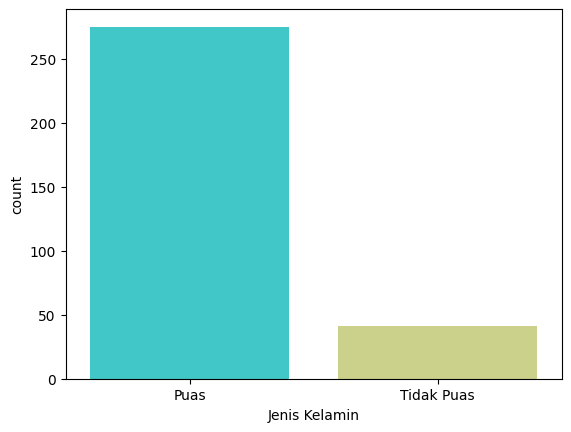

In [112]:
sns.countplot(x=data["kepuasan_konsumen"], data=data, palette="rainbow", order=data["kepuasan_konsumen"].value_counts().index.tolist())
plt.xlabel("Jenis Kelamin")
new_xticklabels = ["Puas", "Tidak Puas"]
plt.xticks([0, 1], new_xticklabels)
plt.show()

## **Data Pre-Processing**

### 1. Missing Values

Memeriksa apakah terdapat missing value pada data yang akan digunakan, dan didapatkan output di bawah bahwa tidak terdeteksi adanya missing value pada data.

In [113]:
data.isna().sum()

gender                    0
prodi                     0
angkatan                  0
usia                      0
ketersediaan_produk       0
kualitas_produk           0
harga                     0
promosi                   0
ketepatan_pengiriman      0
penanganan_keluhan        0
frekuensi_akses_shopee    0
frekuensi_transaksi       0
kepuasan_konsumen         0
skor_kepuasan             0
dtype: int64

### 2. Outliers

Memeriksa apakah terdapat nilai _outlier_ pada variabel dengan tipe data _integer_ (usia, frekuensi_akses_shopee, dan frekuensi_transaksi).



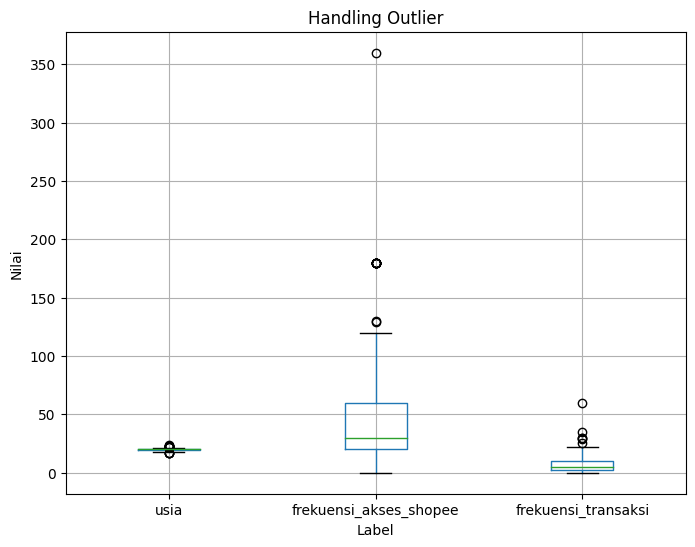

In [114]:
columns = ['usia', 'frekuensi_akses_shopee', 'frekuensi_transaksi']

plt.figure(figsize=(8, 6))
data.boxplot(column=columns)
plt.title('Handling Outlier')
plt.xlabel('Label')
plt.ylabel('Nilai')
plt.show()

Dari hasil visualisasi _outlier_ di atas, dapat terlihat bahwa terdapat _outlier_ pada variabel frekuensi_akses_shopee dan frekuensi_transaksi. Namun, kami memutuskan untuk tidak menghapus nilai tersebut karena termasuk dalam informasi penting pada data yang dapat mempengaruhi model.

### 3. Variable Selection

Mendeklarasikan variabel **y** sebagai variabel target, dan membedakan variabel **X** sebagai variabel prediktor dengan tipe data kategorik dan tipe data numerik untuk dilakukan _data encoding_ pada langkah selanjutnya, serta menghapus atribut "prodi" dan "angkatan" pada data yang digunakan.

In [115]:
y = data['kepuasan_konsumen']
X_kategorik = data[['gender', 'ketersediaan_produk', 'kualitas_produk', 'harga', 'promosi', 'ketepatan_pengiriman', 'penanganan_keluhan']]
X_numerik = data[['usia', 'frekuensi_akses_shopee', 'frekuensi_transaksi','skor_kepuasan']]

### 4. Data Encoding

Melakukan pengkodean data (data encoding), yaitu mengubah data kategorikal menjadi data numerik agar dapat digunakan sebagai input ke dalam model yang akan dibuat menggunakan label encode

In [116]:
def encode_data(X, y):
    label_encoder = LabelEncoder()
    X_encoded = X.copy()
    y_encoded = y.copy()
    
    # Melakukan label encoding pada variabel X
    for column in X_encoded.columns:
        X_encoded[column] = label_encoder.fit_transform(X_encoded[column])
    
    # Melakukan label encoding pada variabel y
    y_encoded = label_encoder.fit_transform(y_encoded)
    
    return X_encoded, y_encoded

X_encoded, y_encoded = encode_data(X_kategorik, y)

In [117]:
X_encoded

,gender,ketersediaan_produk,kualitas_produk,harga,promosi,ketepatan_pengiriman,penanganan_keluhan
0,1,0,0,0,0,1,0
1,0,0,1,1,0,1,0
2,0,0,1,1,0,1,0
3,0,0,1,1,1,1,0
4,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...
311,0,0,1,1,1,1,0
312,0,0,0,0,1,1,0
313,0,1,1,0,0,0,1
314,0,1,0,0,1,0,1


In [118]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [119]:
# Menggabungkan variabel X kategorik yang sudah dikodekan dengan variabel X numerik

X_merged = pd.concat([X_encoded, X_numerik], axis=1)

X_merged

,gender,ketersediaan_produk,kualitas_produk,harga,promosi,ketepatan_pengiriman,penanganan_keluhan,usia,frekuensi_akses_shopee,frekuensi_transaksi,skor_kepuasan
0,1,0,0,0,0,1,0,19,120,6,3
1,0,0,1,1,0,1,0,21,10,3,4
2,0,0,1,1,0,1,0,21,7,3,3
3,0,0,1,1,1,1,0,19,30,1,4
4,1,0,1,1,0,1,0,19,10,10,4
...,...,...,...,...,...,...,...,...,...,...,...
311,0,0,1,1,1,1,0,20,45,2,4
312,0,0,0,0,1,1,0,19,5,2,2
313,0,1,1,0,0,0,1,18,8,3,2
314,0,1,0,0,1,0,1,18,5,0,1


## **Data Partition**

Melakukan partisi data menggunakan train test split, yaitu membagi data yang akan digunakan untuk Training (pelatihan) dan Test (pengujian) dengan proporsi 20% data test dan 80% data train.

In [120]:
# Train Test Split
X_train, X_test,  y_train, y_test = train_test_split(X_merged, y_encoded, test_size=0.2, random_state=42)

# Cross-Validation
k_folds = KFold(n_splits=5, shuffle=False, random_state=None)

In [121]:
print("Dimensi X_train\t:", X_train.shape)
print("Dimensi X_test\t:", X_test.shape)
print("Dimensi y_train\t:", y_train.shape)
print("Dimensi y_test\t:", y_test.shape)

Dimensi X_train	: (252, 11)
Dimensi X_test	: (64, 11)
Dimensi y_train	: (252,)
Dimensi y_test	: (64,)


## **Data Modelling**

### 1. Random Forest

In [122]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Modelling classifier using data train
model_rf = rf.fit(X_train, y_train)

# target variables prediction using random forest models classifier
y_pred_rf = model_rf.predict(X_test)

# Calculate confusion matrix and accuracy score
cm_rf = confusion_matrix(y_test, y_pred_rf) 
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate cross validation score
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=k_folds)

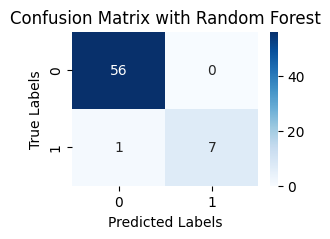


Accuracy Score		: 0.984375
Cross-Validation Score	: [0.90196078 0.98039216 1.         0.98       0.94      ]
Average CV Score	: 0.9604705882352942

Classification Report	:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.88      0.93         8

    accuracy                           0.98        64
   macro avg       0.99      0.94      0.96        64
weighted avg       0.98      0.98      0.98        64



In [123]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Accuracy Score
print("\nAccuracy Score\t\t:", accuracy_rf)

# Cross-Validation Score
print("Cross-Validation Score\t:", cv_scores_rf)
print("Average CV Score\t:", cv_scores_rf.mean())

# Classification Report
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report\t:\n", classification_rep_rf)

In [124]:
# Print Train and Test Score
train_score_rf = rf.score(X_train, y_train)
test_score_rf = rf.score(X_test, y_test)
print("Train Score\t:", train_score_rf)
print("Test Score\t:", test_score_rf)

Train Score	: 0.996031746031746
Test Score	: 0.984375


### 2. Decision Tree

In [125]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Modelling classifier using data train
model_dt = dt.fit(X_train, y_train)

# target variables prediction using decision tree models classifier
y_pred_dt = model_dt.predict(X_test)

# Calculate confusion matrix and accuracy score
cm_dt = confusion_matrix(y_test, y_pred_dt) 
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Calculate cross validation score
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=k_folds)


[Text(0.5, 0.95, 'x[10] <= 2.5\ngini = 0.228\nsamples = 252\nvalue = [219, 33]'),
 Text(0.2, 0.85, 'x[5] <= 0.5\ngini = 0.278\nsamples = 36\nvalue = [6, 30]'),
 Text(0.1, 0.75, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.3, 0.75, 'x[10] <= 1.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.2, 0.65, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4, 0.65, 'x[2] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.3, 0.55, 'x[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.2, 0.45, 'x[8] <= 7.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.1, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.85, 'x[9] <= 3.5\ngini = 0.027\nsamples = 216\nvalue = [213, 3]'),
 Text(0.7, 0.75, 'x[8] <= 55.0\ngini = 0.075\nsamples = 77\nvalue = [74, 3]'),
 Text(0.6,

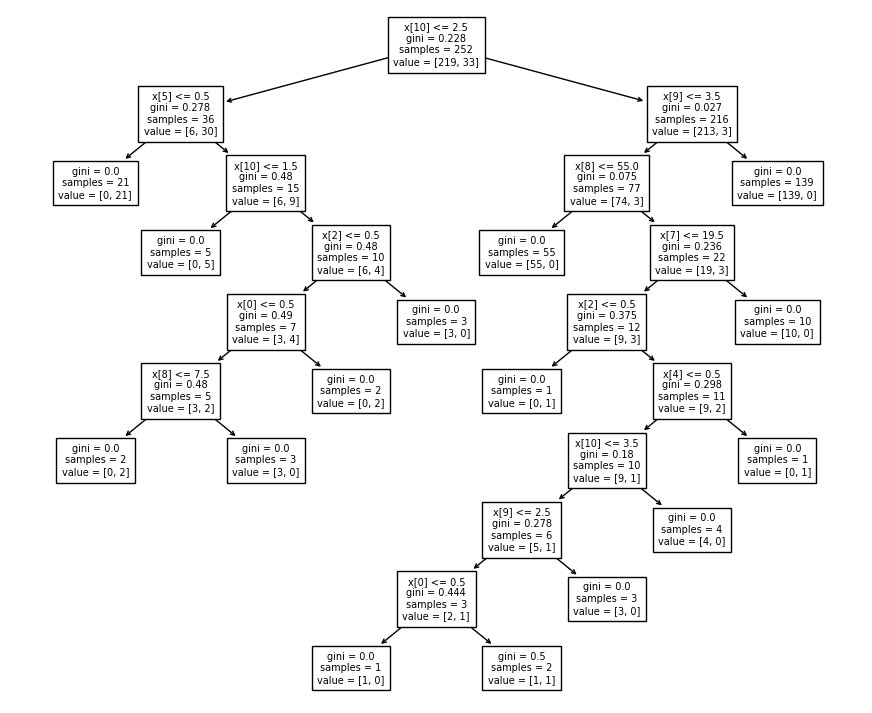

In [126]:
# Make a decision tree
plt.figure(figsize=(11,9))
tree.plot_tree(model_dt, fontsize=7)

Berdasarkan hasil klasifikasi dengan metode decision tree didapatkan suatu pohon keputusan gambar tersebut. Terdapat beberapa hal yang dapat mempengaruhi tingkat kepuasan customer pada layanan e-commerce dengan 11 cabang yang membentuk serangkaian rule untuk mengklasifikasikan data tersebut.

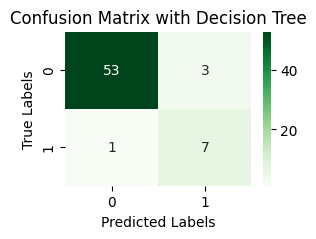


Accuracy Score		: 0.9375
Cross-Validation Score	: [0.92156863 0.92156863 0.94       0.98       0.86      ]
Average CV Score	: 0.9246274509803921

Classification Report	:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.70      0.88      0.78         8

    accuracy                           0.94        64
   macro avg       0.84      0.91      0.87        64
weighted avg       0.95      0.94      0.94        64



In [127]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix with Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Accuracy Score
print("\nAccuracy Score\t\t:", accuracy_dt)

# Cross-Validation Score
print("Cross-Validation Score\t:", cv_scores_dt)
print("Average CV Score\t:", cv_scores_dt.mean())

# Classification Report
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report\t:\n", classification_rep_dt)

In [128]:
# Print Train and Test Score
train_score_dt = dt.score(X_train, y_train)
test_score_dt = dt.score(X_test, y_test)
print("Train Score\t:", train_score_dt)
print("Test Score\t:", test_score_dt)

Train Score	: 0.996031746031746
Test Score	: 0.9375


### 3. Support Vector Machine (SVM)

In [129]:
# SVM Classifier
svm = SVC()

# Modelling classifier using data train
model_svm = svm.fit(X_train, y_train)

# target variables prediction using SVM models classifier
y_pred_svm = model_svm.predict(X_test)

# Calculate confusion matrix and accuracy score
cm_svm = confusion_matrix(y_test, y_pred_svm) 
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Calculate cross validation score
cv_scores_svm = cross_val_score(svm, X_train, y_train, cv=k_folds)


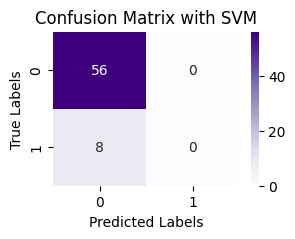


Accuracy Score		: 0.875
Cross-Validation Score	: [0.84313725 0.88235294 0.94       0.8        0.88      ]
Average CV Score	: 0.8690980392156863

Classification Report	:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        56
           1       0.00      0.00      0.00         8

    accuracy                           0.88        64
   macro avg       0.44      0.50      0.47        64
weighted avg       0.77      0.88      0.82        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix with SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Accuracy Score
print("\nAccuracy Score\t\t:", accuracy_svm)

# Cross-Validation Score
print("Cross-Validation Score\t:", cv_scores_svm)
print("Average CV Score\t:", cv_scores_svm.mean())

# Classification Report
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report\t:\n", classification_rep_svm)

In [131]:
# Print Train and Test Score
train_score_svm = model_svm.score(X_train, y_train)
test_score_svm = model_svm.score(X_test, y_test)
print("Train Score\t:", train_score_svm)
print("Test Score\t:", test_score_svm)

Train Score	: 0.8690476190476191
Test Score	: 0.875


### 4. K-Nearest Neighbour

In [132]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Modelling classifier using data train
model_knn = knn.fit(X_train, y_train)

# target variables prediction using KNN models classifier
y_pred_knn = model_knn.predict(X_test)

# Calculate confusion matrix and accuracy score
cm_knn = confusion_matrix(y_test, y_pred_knn) 
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate cross validation score
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=k_folds)


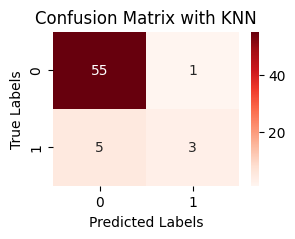


Accuracy Score		: 0.90625
Cross-Validation Score	: [0.84313725 0.92156863 0.92       0.8        0.92      ]
Average CV Score	: 0.8809411764705881

Classification Report	:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        56
           1       0.75      0.38      0.50         8

    accuracy                           0.91        64
   macro avg       0.83      0.68      0.72        64
weighted avg       0.90      0.91      0.89        64



In [133]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix with KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Accuracy Score
print("\nAccuracy Score\t\t:", accuracy_knn)

# Cross-Validation Score
print("Cross-Validation Score\t:", cv_scores_knn)
print("Average CV Score\t:", cv_scores_knn.mean())

# Classification Report
classification_rep_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report\t:\n", classification_rep_knn)

In [134]:
# Print Train and Test Score
train_score_knn = model_knn.score(X_train, y_train)
test_score_knn = model_knn.score(X_test, y_test)
print("Train Score\t:", train_score_knn)
print("Test Score\t:", test_score_knn)

Train Score	: 0.9404761904761905
Test Score	: 0.90625


### 5. Naive Bayes

In [135]:
# Naive Bayes Classifier
nb = GaussianNB()

# Modelling classifier using data train
model_nb = nb.fit(X_train, y_train)

# target variables prediction using naive bayes models classifier
y_pred_nb = model_nb.predict(X_test)

# Calculate confusion matrix and accuracy score
cm_nb = confusion_matrix(y_test, y_pred_nb) 
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Calculate cross validation score
cv_scores_nb = cross_val_score(nb, X_train, y_train, cv=k_folds)

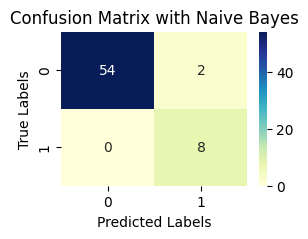


Accuracy Score		: 0.96875
Cross-Validation Score	: [0.92156863 0.94117647 0.94       0.92       0.98      ]
Average CV Score	: 0.9405490196078432

Classification Report	:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.80      1.00      0.89         8

    accuracy                           0.97        64
   macro avg       0.90      0.98      0.94        64
weighted avg       0.97      0.97      0.97        64



In [136]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix with Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Accuracy Score
print("\nAccuracy Score\t\t:", accuracy_nb)

# Cross-Validation Score
print("Cross-Validation Score\t:", cv_scores_nb)
print("Average CV Score\t:", cv_scores_nb.mean())

# Classification Report
classification_rep_nb = classification_report(y_test, y_pred_nb)
print("\nClassification Report\t:\n", classification_rep_nb)

In [137]:
# Print Train and Test Score
train_score_nb = model_nb.score(X_train, y_train)
test_score_nb = model_nb.score(X_test, y_test)
print("Train Score\t:", train_score_nb)
print("Test Score\t:", test_score_nb)

Train Score	: 0.9404761904761905
Test Score	: 0.96875
